In [12]:
import pandas as pd
import numpy as np

# Load the original dataset
df = pd.read_csv('ocean_world_dataset.csv')

# Add some null values
def add_null_values(df, num_nulls):
    np.random.seed(42)  # For reproducibility
    for _ in range(num_nulls):
        i = np.random.randint(0, len(df))
        col = np.random.choice(df.columns)
        df.at[i, col] = np.nan
    return df

# Add outliers
def add_outliers(df, num_outliers):
    np.random.seed(42)  # For reproducibility
    for _ in range(num_outliers):
        i = np.random.randint(0, len(df))
        col = np.random.choice(df.columns)
        outlier_value = df[col].max() * 10  # Creating a large outlier value
        df.at[i, col] = outlier_value
    return df

# Add null values and outliers
df= df.astype(float)
df_with_nulls = add_null_values(df.copy(), 20)
df_with_outliers = add_outliers(df_with_nulls, 15)

# Save the dataset with null values and outliers
df_with_outliers.to_csv('ocean_world_dataset_with_nulls_and_outliers.csv', index=False)


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('ocean_world_dataset_with_nulls_and_outliers.csv')


In [14]:
df.head()

,vent_latitude,vent_longitude,vent_depth,eruption_rate,lava_temp,sulfur_concentration,methane_concentration,iron_concentration,tectonic_shift_rate,seafloor_temp,seafloor_pressure,pH_level,redox_potential,microbial_species_count,complex_life_count,energy_transfer_rate,adaptive_heat_tolerance,adaptive_pressure_resistance,species_diversity_index
0,-22.582779,38.716147,2554.709159,1.283983,1249.672202,9.091832,1.711921,8.276133,4.702888,80.936116,120.672688,5.135836,-67.098044,2122.0,193.0,7.036285,420.255658,196.080459,0.774620
1,845.837734,-118.611315,2085.396127,7.161123,1364.918690,2.471663,0.576233,10.409238,4.770104,81.011339,312.541853,7.547077,85.972931,5079.0,422.0,8.451157,384.895246,402.094058,0.453691
2,41.758910,-156.581427,4314.950037,7.631772,613.404517,1.534459,4.624221,9.814223,4.575173,86.707232,316.254049,3.086361,-25.048266,2571.0,118.0,8.735253,356.467742,252.711914,0.846248
3,17.758527,161.598793,2427.013307,5.656644,343.067502,4.945582,4.387923,3.441613,1.857092,91.324055,354.971961,3.696436,27.370074,6073.0,148.0,8.465567,156.877912,682.163526,0.612173
4,-61.916645,167.627532,2123.738039,7.732575,496.315711,9.857939,1.297129,10.711470,0.087129,51.134240,390.436533,3.276016,264.878885,6104.0,445.0,4.547869,230.100302,449.441546,NaN


In [15]:
# 1. Handling Missing Values
# Check for missing values
missing_values = df.isnull().sum()
missing_values

vent_latitude                   0
vent_longitude                  0
vent_depth                      1
eruption_rate                   0
lava_temp                       0
sulfur_concentration            0
methane_concentration           0
iron_concentration              0
tectonic_shift_rate             1
seafloor_temp                   0
seafloor_pressure               0
pH_level                        0
redox_potential                 0
microbial_species_count         0
complex_life_count              1
energy_transfer_rate            0
adaptive_heat_tolerance         0
adaptive_pressure_resistance    0
species_diversity_index         2
dtype: int64

In [16]:
df.fillna(df.median(), inplace=True)

In [17]:
missing_values = df.isnull().sum()
missing_values

vent_latitude                   0
vent_longitude                  0
vent_depth                      0
eruption_rate                   0
lava_temp                       0
sulfur_concentration            0
methane_concentration           0
iron_concentration              0
tectonic_shift_rate             0
seafloor_temp                   0
seafloor_pressure               0
pH_level                        0
redox_potential                 0
microbial_species_count         0
complex_life_count              0
energy_transfer_rate            0
adaptive_heat_tolerance         0
adaptive_pressure_resistance    0
species_diversity_index         0
dtype: int64

In [18]:
# 2. Scaling/Normalization
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(df[['vent_depth', 'lava_temp', 'sulfur_concentration', 
                                                'methane_concentration', 'iron_concentration', 
                                                'seafloor_temp', 'seafloor_pressure']])
df_minmax = pd.DataFrame(scaled_minmax, columns=['vent_depth_scaled', 'lava_temp_scaled', 
                                                 'sulfur_concentration_scaled', 'methane_concentration_scaled',
                                                 'iron_concentration_scaled', 'seafloor_temp_scaled',
                                                 'seafloor_pressure_scaled'])

In [19]:
# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(df[['vent_depth', 'lava_temp', 'sulfur_concentration', 
                                                    'methane_concentration', 'iron_concentration', 
                                                    'seafloor_temp', 'seafloor_pressure']])
df_standard = pd.DataFrame(scaled_standard, columns=['vent_depth_standard', 'lava_temp_standard', 
                                                     'sulfur_concentration_standard', 'methane_concentration_standard',
                                                     'iron_concentration_standard', 'seafloor_temp_standard',
                                                     'seafloor_pressure_standard'])

Number of outliers detected in each column:
vent_latitude                   1
vent_longitude                  1
vent_depth                      1
eruption_rate                   1
lava_temp                       0
sulfur_concentration            1
methane_concentration           1
iron_concentration              1
tectonic_shift_rate             0
seafloor_temp                   1
seafloor_pressure               1
pH_level                        2
redox_potential                 0
microbial_species_count         0
complex_life_count              1
energy_transfer_rate            1
adaptive_heat_tolerance         1
adaptive_pressure_resistance    0
species_diversity_index         1
dtype: int64


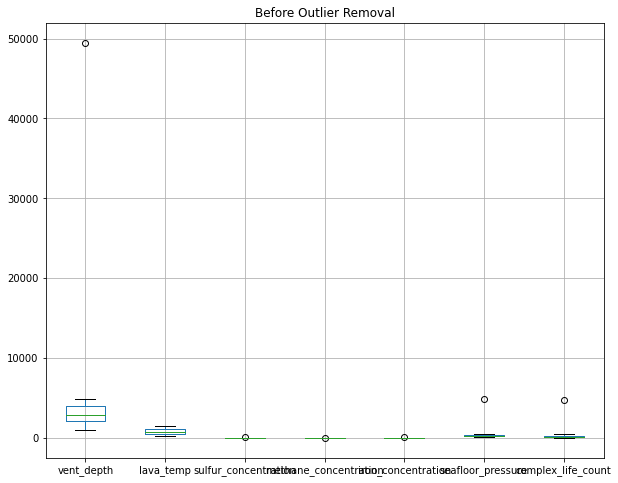

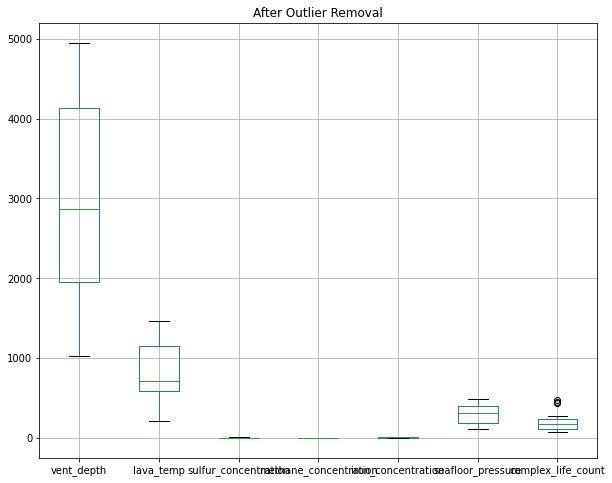

Original dataset shape: (30, 19)
Dataset shape after outlier removal: (16, 19)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df < lower_bound) | (df > upper_bound))
    return outliers

# Detect outliers for each numerical column
outliers = detect_outliers_iqr(df)

# Show the number of outliers detected in each column
print("Number of outliers detected in each column:")
print(outliers.sum())

# Visualizing dataset before outlier removal (using boxplots)
plt.figure(figsize=(10, 8))
df[['vent_depth', 'lava_temp', 'sulfur_concentration', 
    'methane_concentration', 'iron_concentration', 
    'seafloor_pressure', 'complex_life_count']].boxplot()
plt.title('Before Outlier Removal')
plt.show()

# Removing outliers
df_no_outliers = df[~((df < (df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25)))) |
                      (df > (df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25)))))].dropna()

# Visualizing dataset after outlier removal (using boxplots)
plt.figure(figsize=(10, 8))
df_no_outliers[['vent_depth', 'lava_temp', 'sulfur_concentration', 
                'methane_concentration', 'iron_concentration', 
                'seafloor_pressure', 'complex_life_count']].boxplot()
plt.title('After Outlier Removal')
plt.show()

# Checking the difference in number of rows before and after outlier removal
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")


In [23]:
# 4. Feature Engineering
# Interaction between sulfur and methane concentration
df['sulfur_methane_ratio'] = df['sulfur_concentration'] / df['methane_concentration']

In [24]:
# Log transformation for skewed data (e.g., microbial_species_count)
df['log_microbial_species_count'] = np.log1p(df['microbial_species_count'])

In [25]:
# 6. Binning
# Binning vent_depth into 3 categories: shallow, moderate, deep
df['depth_category'] = pd.cut(df['vent_depth'], bins=3, labels=['shallow', 'moderate', 'deep'])

In [33]:
correlation_matrix = df.corr()

# Display results
print("Missing Values in the Dataset:\n", missing_values)
print("\nFirst 5 Rows of Min-Max Scaled Data:\n", df_minmax.head())
print("\nFirst 5 Rows of Standardized Data:\n", df_standard.head())

Missing Values in the Dataset:
 vent_latitude                   0
vent_longitude                  0
vent_depth                      0
eruption_rate                   0
lava_temp                       0
sulfur_concentration            0
methane_concentration           0
iron_concentration              0
tectonic_shift_rate             0
seafloor_temp                   0
seafloor_pressure               0
pH_level                        0
redox_potential                 0
microbial_species_count         0
complex_life_count              0
energy_transfer_rate            0
adaptive_heat_tolerance         0
adaptive_pressure_resistance    0
species_diversity_index         0
dtype: int64

First 5 Rows of Min-Max Scaled Data:
    vent_depth_scaled  lava_temp_scaled  sulfur_concentration_scaled  \
0           0.031631          0.829667                     0.089789   
1           0.021945          0.921550                     0.022453   
2           0.067959          0.322390                   

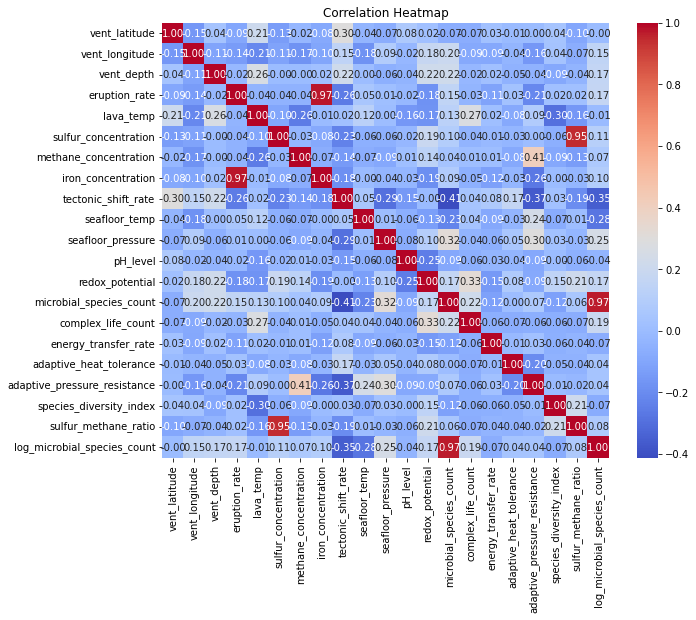

In [34]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

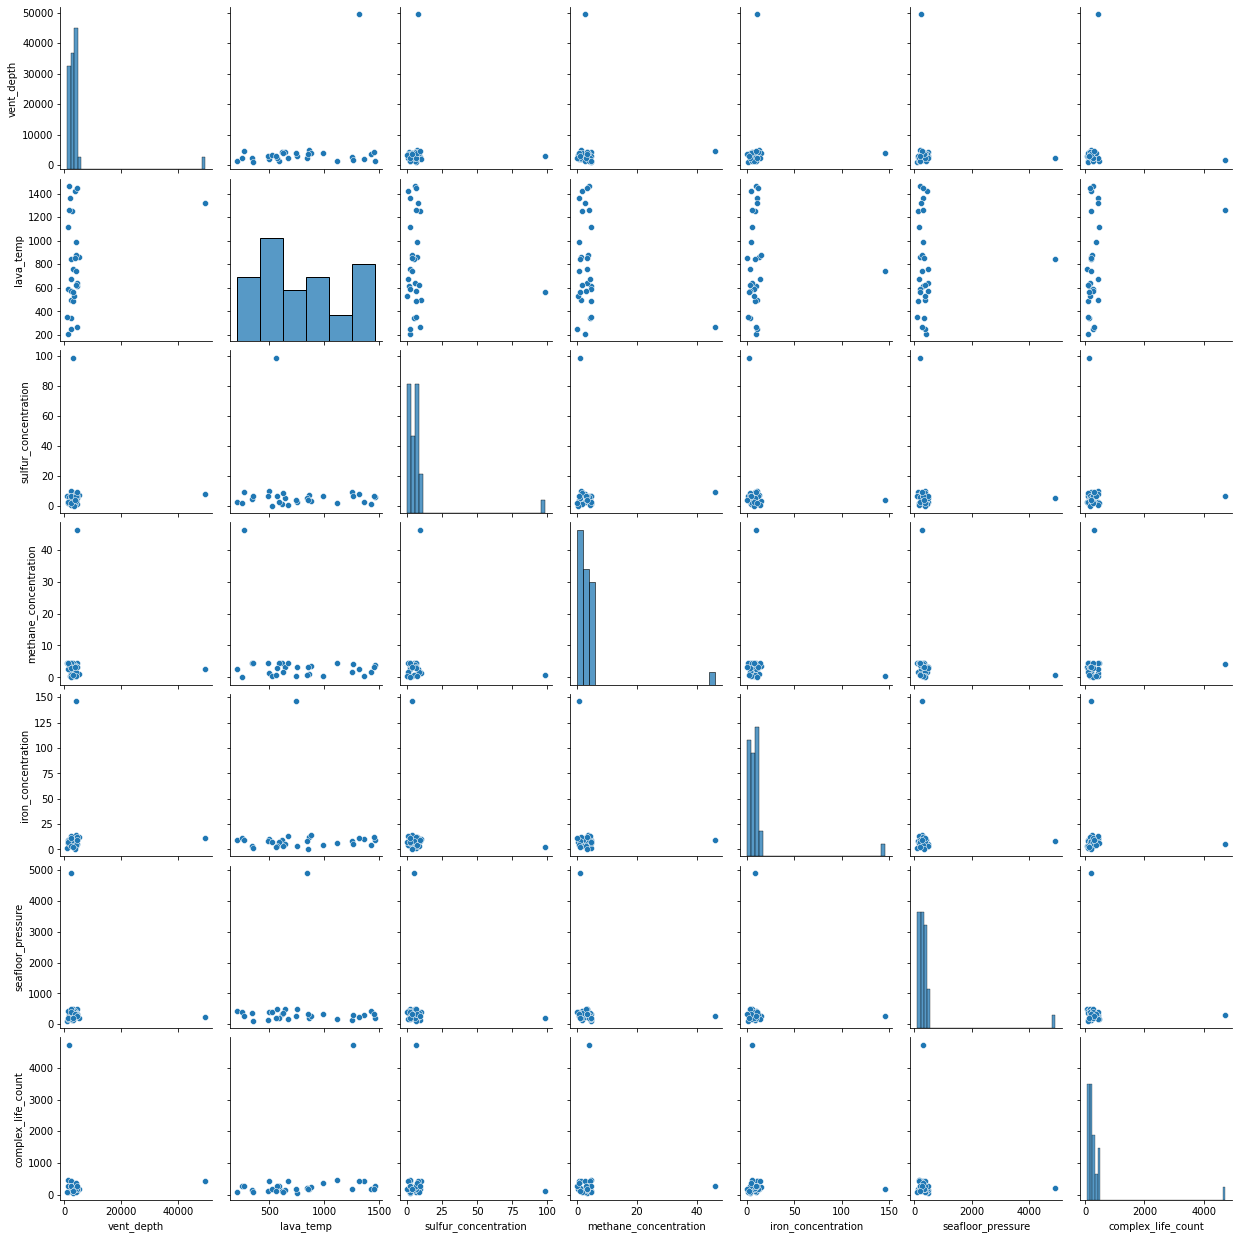

In [35]:
# 2. Pairplot to visualize feature relationships
sns.pairplot(df[['vent_depth', 'lava_temp', 'sulfur_concentration', 
                 'methane_concentration', 'iron_concentration', 
                 'seafloor_pressure', 'complex_life_count']])
plt.show()

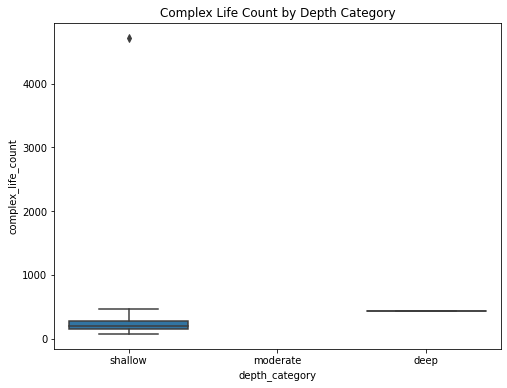

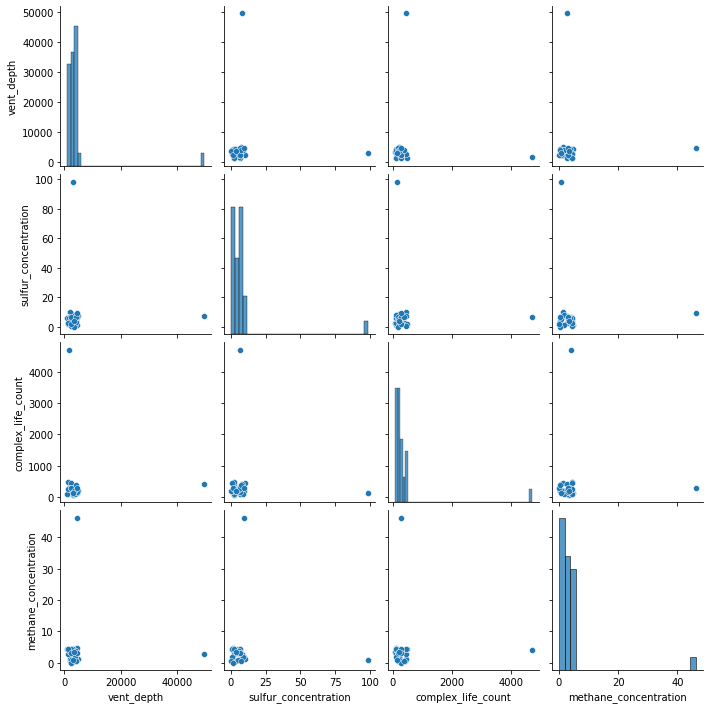

In [36]:
# 5. Boxplot for categorical feature (if applicable)
# Example: depth_category vs complex_life_count
plt.figure(figsize=(8, 6))
sns.boxplot(x='depth_category', y='complex_life_count', data=df)
plt.title('Complex Life Count by Depth Category')
plt.show()

# 6. Pairwise scatter plots of important features (based on correlation or importance)
sns.pairplot(df[['vent_depth', 'sulfur_concentration', 'complex_life_count', 'methane_concentration']])
plt.show()


In [37]:
df.to_csv('preprocessed_ocean_world_dataset.csv', index=False)